# Boletim Epidemiológico + Google Mobility

Este Notebook busca analisar os dados de dois DataSets: Boletim Epidemiológico do Brasil.io com o Google Mobility transformados por `transform_boletim-mobile.ipynb`.

In [1]:
# Carregar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")
plt.style.use('bmh')
%matplotlib inline

shift = 0

In [2]:
#df_cidade = pd.read_pickle('./dataframes/df_mob_cidade.pkl')
# Carregar o DF com coluna do PCA
df_cidade = pd.read_pickle('./dataframes/df_mob_cidade_pca.pkl')
# Retira dias antes do lockdown
df_cidade = df_cidade[df_cidade.index >= "2020-04-01"]
df_casos = pd.read_pickle('./dataframes/df_casos_cidade.plk').shift(-shift)
# Retira dias antes do lockdown
df_casos = df_casos[df_casos.index >= "2020-04-01"]

In [3]:
df_cidade

Retail_Recriation  Grocery_Pharmacy  Parks  Transit  Workplaces  \
date                                                                          
2020-04-01              -72.0             -19.0  -67.0    -65.0       -58.0   
2020-04-02              -73.0             -24.0  -67.0    -66.0       -58.0   
2020-04-03              -74.0             -22.0  -69.0    -64.0       -56.0   
2020-04-04              -79.0             -25.0  -80.0    -65.0       -47.0   
2020-04-05              -81.0             -30.0  -77.0    -65.0       -36.0   
...                       ...               ...    ...      ...         ...   
2020-11-27               -2.0              33.0  -39.0      2.0        -5.0   
2020-11-28               -8.0              25.0  -43.0      2.0         4.0   
2020-11-29               -6.0              39.0  -24.0     28.0        13.0   
2020-11-30              -18.0              12.0  -42.0     -5.0        -7.0   
2020-12-01              -11.0              23.0  -42.0      0.0        -9.0   

            Residential  component_1  component_2  
date                                               
2020-04-01         22.0     2.559338     0.443191  
2020-04-02         22.0     2.725024     0.590175  
2020-04-03         23.0     2.650385     0.434910  
2020-04-04         20.0     2.855178     0.011981  
2020-04-05         17.0     2.742654     0.175526  
...                 ...          ...          ...  
2020-11-27          7.0    -2.925423    -0.564457  
2020-11-28          6.0    -2.718922    -0.566147  
2020-11-29          5.0    -4.129295    -0.324296  
2020-11-30          9.0    -1.861244    -0.032968  
2020-12-01          8.0    -2.327362    -0.344101  

[245 rows x 8 columns]

In [4]:
df_casos

city  city_ibge_code  epidemiological_week  \
date                                                          
2020-04-01  Fortaleza       2304400.0                    14   
2020-04-02  Fortaleza       2304400.0                    14   
2020-04-03  Fortaleza       2304400.0                    14   
2020-04-04  Fortaleza       2304400.0                    14   
2020-04-05  Fortaleza       2304400.0                    15   
...               ...             ...                   ...   
2020-11-30  Fortaleza       2304400.0                    49   
2020-12-01  Fortaleza       2304400.0                    49   
2020-12-02  Fortaleza       2304400.0                    49   
2020-12-03  Fortaleza       2304400.0                    49   
2020-12-04  Fortaleza       2304400.0                    49   

            estimated_population  estimated_population_2019  is_last  \
date                                                                   
2020-04-01             2686612.0                  2669342.0    False   
2020-04-02             2686612.0                  2669342.0    False   
2020-04-03             2686612.0                  2669342.0    False   
2020-04-04             2686612.0                  2669342.0    False   
2020-04-05             2686612.0                  2669342.0    False   
...                          ...                        ...      ...   
2020-11-30             2686612.0                  2669342.0    False   
2020-12-01             2686612.0                  2669342.0    False   
2020-12-02             2686612.0                  2669342.0    False   
2020-12-03             2686612.0                  2669342.0    False   
2020-12-04             2686612.0                  2669342.0     True   

            is_repeated  last_available_confirmed  \
date                                                
2020-04-01        False                       413   
2020-04-02        False                       526   
2020-04-03        False                       600   
2020-04-04        False                       681   
2020-04-05        False                       869   
...                 ...                       ...   
2020-11-30        False                     68908   
2020-12-01        False                     69042   
2020-12-02        False                     69071   
2020-12-03        False                     69387   
2020-12-04        False                     69606   

            last_available_confirmed_per_100k_inhabitants last_available_date  \
date                                                                            
2020-04-01                                       15.37252          2020-04-01   
2020-04-02                                       19.57856          2020-04-02   
2020-04-03                                       22.33296          2020-04-03   
2020-04-04                                       25.34791          2020-04-04   
2020-04-05                                       32.34557          2020-04-05   
...                                                   ...                 ...   
2020-11-30                                     2564.86608          2020-11-30   
2020-12-01                                     2569.85378          2020-12-01   
2020-12-02                                     2570.93321          2020-12-02   
2020-12-03                                     2582.69523          2020-12-03   
2020-12-04                                     2590.84676          2020-12-04   

            last_available_death_rate  last_available_deaths  order_for_place  \
date                                                                            
2020-04-01                     0.0145                      6               17   
2020-04-02                     0.0000                      0               18   
2020-04-03                     0.0283                     17               19   
2020-04-04                     0.0264                     18               20   
2020-04-05                    

<AxesSubplot:xlabel='date'>

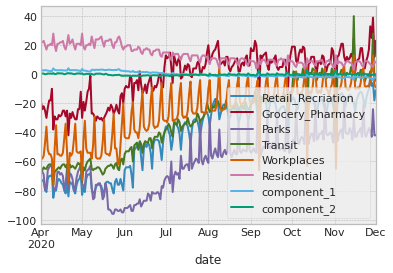

In [5]:
df_cidade.plot.line()

In [6]:
df = df_casos.join(df_cidade).dropna()
df.columns
df.tail(20)

city  city_ibge_code  epidemiological_week  \
date                                                          
2020-11-12  Fortaleza       2304400.0                    46   
2020-11-13  Fortaleza       2304400.0                    46   
2020-11-14  Fortaleza       2304400.0                    46   
2020-11-15  Fortaleza       2304400.0                    47   
2020-11-16  Fortaleza       2304400.0                    47   
2020-11-17  Fortaleza       2304400.0                    47   
2020-11-18  Fortaleza       2304400.0                    47   
2020-11-19  Fortaleza       2304400.0                    47   
2020-11-20  Fortaleza       2304400.0                    47   
2020-11-21  Fortaleza       2304400.0                    47   
2020-11-22  Fortaleza       2304400.0                    48   
2020-11-23  Fortaleza       2304400.0                    48   
2020-11-24  Fortaleza       2304400.0                    48   
2020-11-25  Fortaleza       2304400.0                    48   
2020-11-26  Fortaleza       2304400.0                    48   
2020-11-27  Fortaleza       2304400.0                    48   
2020-11-28  Fortaleza       2304400.0                    48   
2020-11-29  Fortaleza       2304400.0                    49   
2020-11-30  Fortaleza       2304400.0                    49   
2020-12-01  Fortaleza       2304400.0                    49   

            estimated_population  estimated_population_2019  is_last  \
date                                                                   
2020-11-12             2686612.0                  2669342.0    False   
2020-11-13             2686612.0                  2669342.0    False   
2020-11-14             2686612.0                  2669342.0    False   
2020-11-15             2686612.0                  2669342.0    False   
2020-11-16             2686612.0                  2669342.0    False   
2020-11-17             2686612.0                  2669342.0    False   
2020-11-18             2686612.0                  2669342.0    False   
2020-11-19             2686612.0                  2669342.0    False   
2020-11-20             2686612.0                  2669342.0    False   
2020-11-21             2686612.0                  2669342.0    False   
2020-11-22             2686612.0                  2669342.0    False   
2020-11-23             2686612.0                  2669342.0    False   
2020-11-24             2686612.0                  2669342.0    False   
2020-11-25             2686612.0                  2669342.0    False   
2020-11-26             2686612.0                  2669342.0    False   
2020-11-27             2686612.0                  2669342.0    False   
2020-11-28             2686612.0                  2669342.0    False   
2020-11-29             2686612.0                  2669342.0    False   
2020-11-30             2686612.0                  2669342.0    False   
2020-12-01             2686612.0                  2669342.0    False   

            is_repeated  last_available_confirmed  \
date                                                
2020-11-12        False                     60170   
2020-11-13        False                     60890   
2020-11-14        False                     61182   
2020-11-15        False                     62259   
2020-11-16        False                     62909   
2020-11-17        False                     63411   
2020-11-18        False                     63703   
2020-11-19        False                     64343   
2020-11-20        False                     64682   
2020-11-21        False                     64900   
2020-11-22        False                     65102   
2020-11-23        False                     65965   
2020-11-24        False                     66334   
2020-11-25        False                     66721   
2020-11-26        False                     67740   
2020-11-27        False                     67875   
2020-11-28        False                     68319   
2020-11-29        False               

In [7]:
features = ['Retail_Recriation','Grocery_Pharmacy','Parks','Transit','Workplaces','last_available_confirmed_per_100k_inhabitants']
x = df.loc[:, features]

df_corr = x.corr()
fig, ax = plt.subplots(figsize=(7, 5))

hm = sns.heatmap(df_corr, ax = ax, annot=True)
plt.savefig(f'../../04 - Pesquisa/src/figuras/fortaleza_corr_shift{shift}.png')

In [9]:
#sns.pairplot(df[['last_available_confirmed',
#                 'new_confirmed',
#                 'Retail_Recriation',
#                 'Grocery_Pharmacy',
#                 'Parks',
#                 'Transit',
#                 'Residential',
#                 'Workplaces',
#                 'component_1',
#                 'epidemiological_week']].groupby('date').mean())

<AxesSubplot:xlabel='last_available_confirmed_per_100k_inhabitants', ylabel='component_1'>

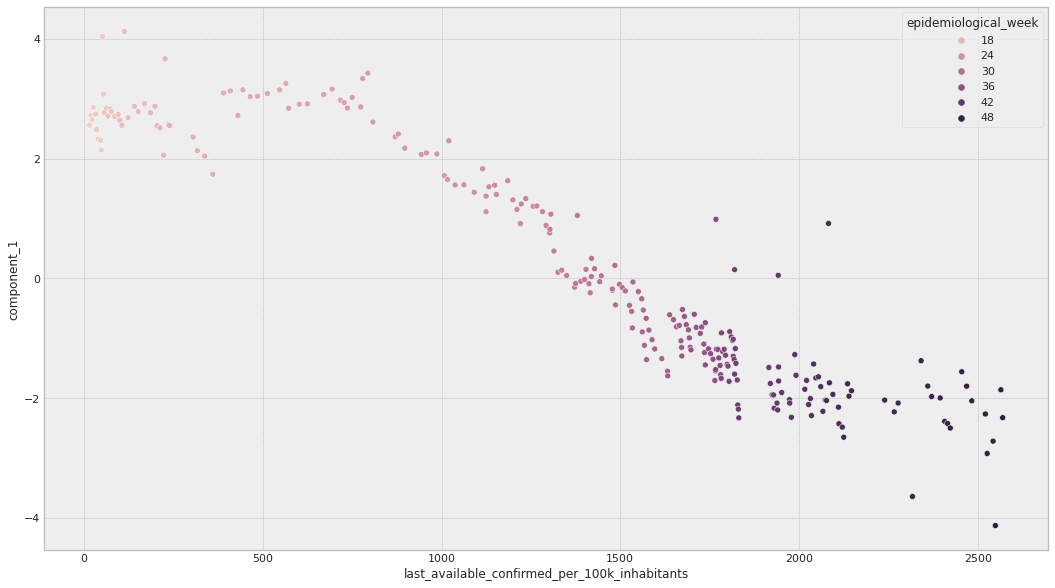

In [10]:
fig = plt.subplots(figsize=(18, 10))
sns.scatterplot(x='last_available_confirmed_per_100k_inhabitants', y='component_1', hue='epidemiological_week', data=df)

In [16]:
df_train = df[df.index < "2020-11-01"]
df_test = df[df.index >= "2020-11-01"]
df_train.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-04-01 to 2020-10-31
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   city                                           214 non-null    object        
 1   city_ibge_code                                 214 non-null    float64       
 2   epidemiological_week                           214 non-null    int64         
 3   estimated_population                           214 non-null    float64       
 4   estimated_population_2019                      214 non-null    float64       
 5   is_last                                        214 non-null    bool          
 6   is_repeated                                    214 non-null    bool          
 7   last_available_confirmed                       214 non-null    int64         
 8   last_available_confirmed_per_100k_inhabit

In [34]:
from statsmodels.formula.api import ols

# Explicar last_available_confirmed por todas as outras features
model = ols("last_available_confirmed_per_100k_inhabitants ~ epidemiological_week + Residential + Retail_Recriation + Grocery_Pharmacy + Parks + Workplaces + Transit", data=df_train.dropna())

response = model.fit()
#response.save("../../04 - Pesquisa/src/modelos/ols_fortaleza_nov.pickle")
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     last_available_confirmed_per_100k_inhabitants   R-squared:                       0.980
Model:                                                       OLS   Adj. R-squared:                  0.979
Method:                                            Least Squares   F-statistic:                     1438.
Date:                                           Tue, 15 Dec 2020   Prob (F-statistic):          4.35e-171
Time:                                                   02:04:55   Log-Likelihood:                -1269.5
No. Observations:                                            214   AIC:                             2555.
Df Residuals:                                                206   BIC:                             2582.
Df Model:                                                      7                                         
Covariance Type:                                       nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -1517.0740    152.791     -9.929      0.000   -1818.308   -1215.840
epidemiological_week    80.2938      3.003     26.736      0.000      74.373      86.215
Residential              8.3545      5.794      1.442      0.151      -3.069      19.778
Retail_Recriation       12.3633      1.454      8.504      0.000       9.497      15.229
Grocery_Pharmacy         8.0187      1.499      5.350      0.000       5.064      10.974
Parks                   -5.1168      0.701     -7.300      0.000      -6.499      -3.735
Workplaces               6.1696      1.311      4.705      0.000       3.584       8.755
Transit                -20.2154      1.595    -12.675      0.000     -23.360     -17.071
==============================================================================
Omnibus:                        4.713   Durbin-Watson:                   0.751
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                4.321
Skew:                          -0.319   Prob(JB):                        0.115
Kurtosis:                       3.280   Cond. No.                     2.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Perguntas:

- Será que se adiantar o número de mortes em ~14 dias, a relação entre os dados de mobilidade firarão mais evidentes?
- Será que se transformar o número de mortes/casos em uma variável discreta (e.g. baixo, médio e alto) as relações ficarão mais evidentes?
- Colocar os dados do google mobility dividido em semanas e avaliar com os dados da semana epidemiológica.
- Os dados do component_1 criado no PCA é o bastante para descrever a mobilidade da cidade?

In [54]:
df_predict = df_test[['epidemiological_week', 'Residential','Retail_Recriation','Grocery_Pharmacy','Parks','Workplaces','Transit']]
resp = response.predict(df_predict)
fig, ax = plt.subplots(figsize=(25,5))
ax.plot(resp.index, resp, '--r', label='Predicted')
ax.plot(df_test.index, df_test.last_available_confirmed_per_100k_inhabitants, '-b', label='Real')
leg = ax.legend();

plt.savefig(f'../../04 - Pesquisa/src/figuras/Prediction_dez_fortaleza.png')